### Step 1: Import Libraries
We start by importing essential Python libraries for deep learning (TensorFlow/Keras), data visualization (Matplotlib, Seaborn), and evaluation metrics (Scikit-learn). Warnings are suppressed for a cleaner notebook experience.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Suppress warnings for clean output
import warnings
warnings.filterwarnings("ignore")


### Step 2: Load the Data
The MNIST dataset is loaded directly from Keras. It consists of 60,000 training images and 10,000 test images of handwritten digits (0–9). Each image is grayscale and 28×28 pixels.


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Sample Label:", y_train[0])


Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)
Sample Label: 5


### Step 3: Exploratory Data Analysis (EDA)
We explore the MNIST dataset visually and statistically:
- **Random Samples**: Shows diversity in handwriting.
- **Class Distribution**: Confirms balanced dataset across digits 0–9.
- **Average Images**: Highlights common patterns for each digit.
- **Pixel Heatmap**: Reveals pixel intensity layout in a single image.



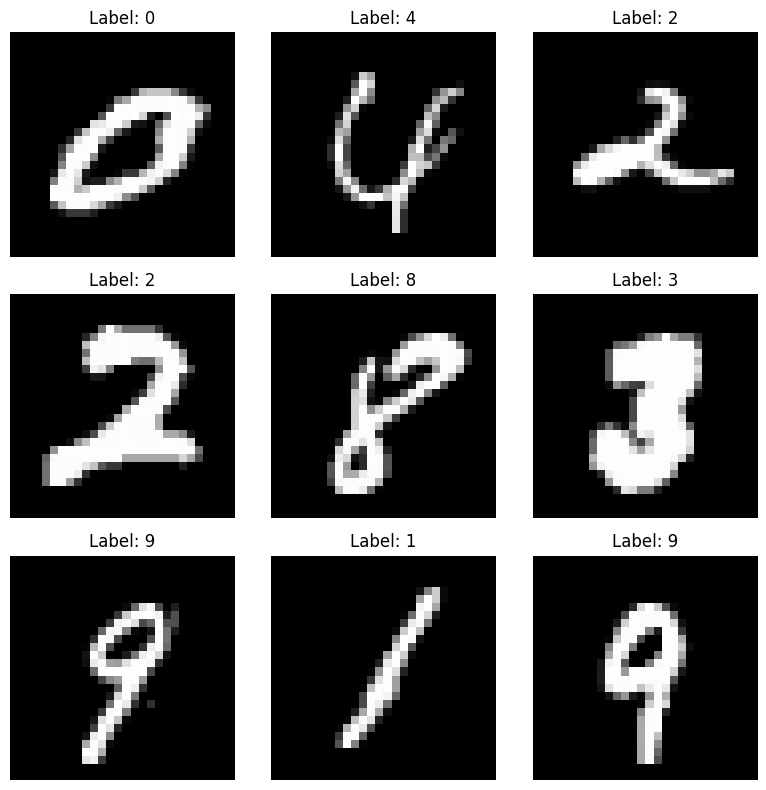

In [3]:
# Plot 9 random digits from training set
plt.figure(figsize=(8, 8))
for i in range(9):
    index = np.random.randint(0, X_train.shape[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


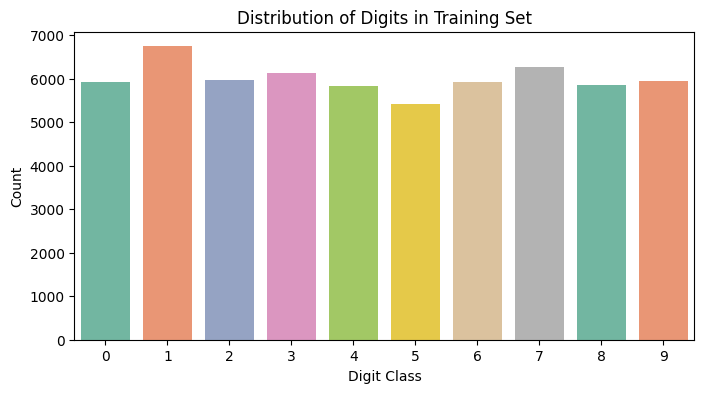

In [4]:
# Plot distribution of digits in training set
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.show()


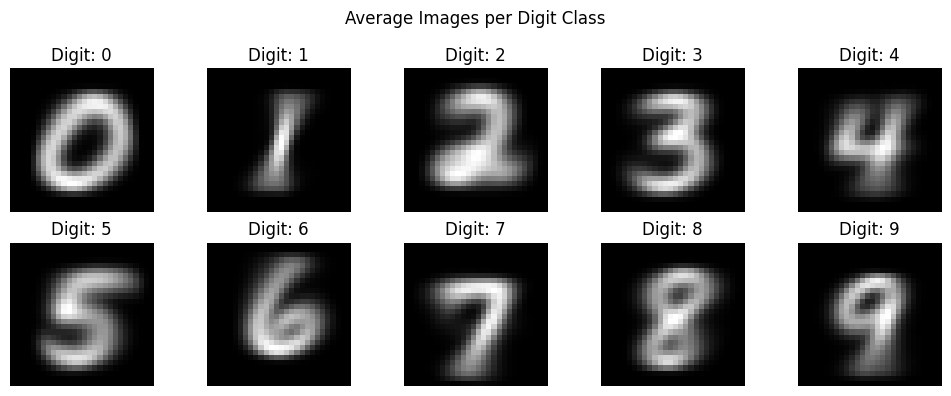

In [5]:
# Calculate average images for each digit class
mean_images = np.zeros((10, 28, 28))
for i in range(10):
    mean_images[i] = X_train[y_train == i].mean(axis=0)

# Plot average images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(f"Digit: {i}")
    plt.axis('off')
plt.suptitle("Average Images per Digit Class")
plt.tight_layout()
plt.show()


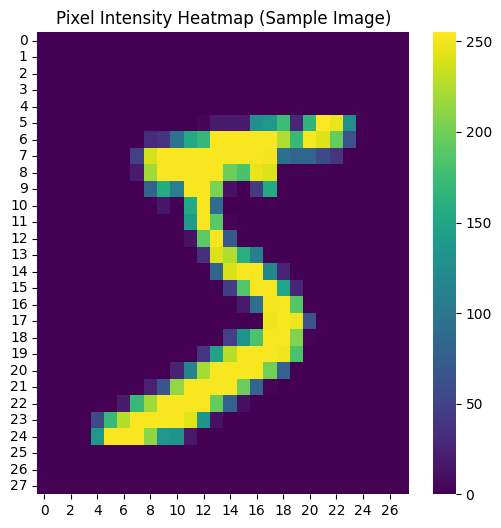

In [6]:
# Plot pixel intensity heatmap of the first image
plt.figure(figsize=(6, 6))
sns.heatmap(X_train[0], cmap='viridis')
plt.title("Pixel Intensity Heatmap (Sample Image)")
plt.show()


### Step 4: Preprocess the Data
- **Normalization**: Scale pixel values to [0,1].
- **One-hot Encoding**: Convert labels into categorical format for classification.


In [7]:
# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Confirm preprocessing
print("X_train shape:", X_train.shape)
print("y_train_cat shape:", y_train_cat.shape)


X_train shape: (60000, 28, 28)
y_train_cat shape: (60000, 10)


### Step 5: Build the ANN Model
Architecture:
- Flatten layer
- Two Dense hidden layers (128 & 64 neurons) with ReLU activation
- Dropout (0.3) for regularization
- Output layer with 10 neurons (softmax)


In [8]:
# Build a Sequential ANN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Compile the Model
Compiled with:
- Optimizer: Adam
- Loss Function: Categorical Crossentropy
- Metric: Accuracy


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Step 7: Train the Model
Trained for 10 epochs with batch size 128 and 10% validation split.


In [10]:
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 117ms/step - accuracy: 0.7631 - loss: 0.7289 - val_accuracy: 0.9792 - val_loss: 0.0733
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 104ms/step - accuracy: 0.9588 - loss: 0.1354 - val_accuracy: 0.9858 - val_loss: 0.0503
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.9715 - loss: 0.0978 - val_accuracy: 0.9897 - val_loss: 0.0418
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9763 - loss: 0.0787 - val_accuracy: 0.9882 - val_loss: 0.0401
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 100ms/step - accuracy: 0.9797 - loss: 0.0689 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9796 - loss: 0.0645 - val_accuracy: 0.9915 - val_loss: 0.0331
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9832 - loss: 0.0553 - val_accuracy: 0.9913 - val_loss: 0.0315
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9845 - loss: 0.0

### Step 8: Evaluate on Test Set
The model achieved a test accuracy of approximately **99%**.


In [11]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9913 - loss: 0.0247
Test Accuracy: 0.9928


### Step 9: Visualize Training History
We plotted the training and validation accuracy and loss over epochs to monitor the model’s learning progress.
This helps us check for overfitting or underfitting trends during training.

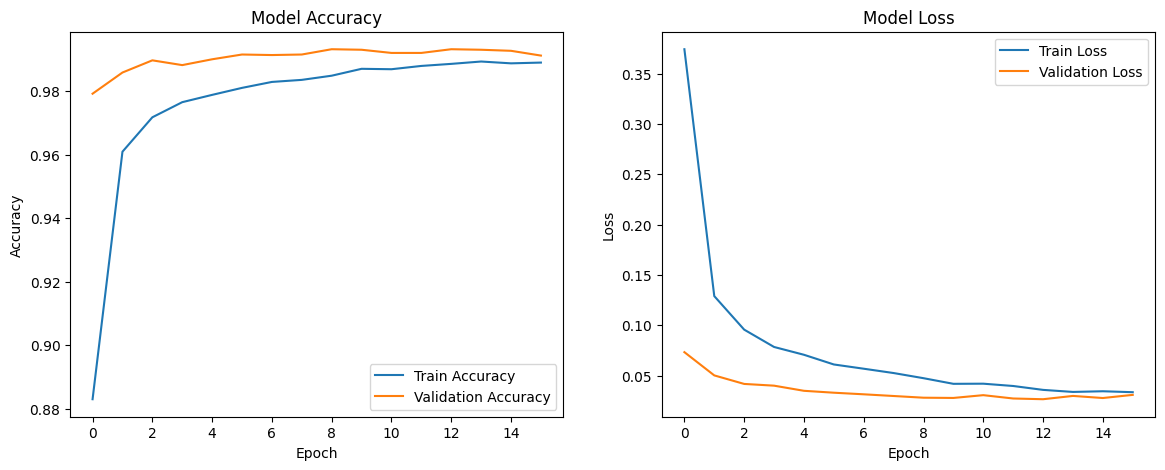

In [12]:
# Plot accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Step 10: Confusion Matrix and Classification Report
We evaluated the model on the test dataset and visualized the results using a confusion matrix.
A detailed classification report shows precision, recall, and F1-score for each digit class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


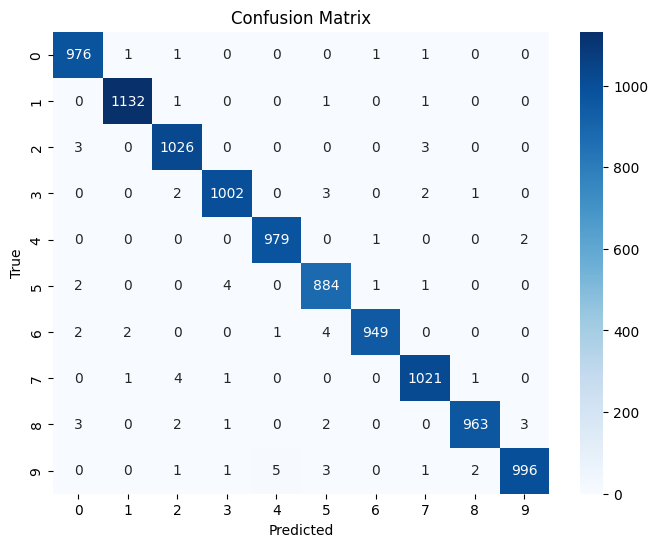

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))


### Step 11: Save and Reload the Model
The trained model was saved in the native Keras .h5 format.
We then reloaded it to confirm that the saved model retains its performance when restored.

In [14]:
# Save the model
model.save("mnist_ann_model.h5")
print("Model saved as mnist_ann_model.h5")

# Reload the model
reloaded_model = load_model("mnist_ann_model.h5")
reloaded_model.evaluate(X_test, y_test_cat)


Model saved as mnist_ann_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9913 - loss: 0.0247


[0.020992159843444824, 0.9927999973297119]

### Step 12: Deploy the Model with Gradio

In this step, we deploy our trained MNIST digit recognition model as an interactive web application using Gradio. This allows users to easily upload handwritten digit images or draw them directly in the browser and get instant predictions.

In [15]:
import gradio as gr

def predict_digit(image):
    import cv2
    # Resize to 28x28, normalize
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = image.reshape(1, 28, 28)

    # Predict
    prediction = reloaded_model.predict(image)
    digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    return f"📝 Predicted Digit: {digit} ({confidence:.2f}% confidence)"

with gr.Blocks() as demo:
    gr.Markdown("## ✏️ MNIST Digit Recognizer\nDraw or upload a digit and get a prediction.")

    with gr.Tab("Upload Image"):
        image_input = gr.Image(
            image_mode="L",
            type="numpy",
            label="Upload a Digit Image (28x28)"
        )
        output_text = gr.Textbox(label="Prediction")
        btn1 = gr.Button("Predict")
        btn1.click(fn=predict_digit, inputs=image_input, outputs=output_text)

    with gr.Tab("Draw Digit"):
        sketch_input = gr.Sketchpad(
            type="numpy",  # Return numpy array
            label="Draw a Digit (0–9)"
        )
        output_text2 = gr.Textbox(label="Prediction")
        btn2 = gr.Button("Predict")
        btn2.click(fn=predict_digit, inputs=sketch_input, outputs=output_text2)

demo.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a4853eed003d9889b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
